In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# DBSCAN_Algorithm

In [4]:
#데이터 불러오기
Data = pd.read_csv('Data.csv')
#Data_real_raw = Data[Data['outlier'] == 0]
Data_real_raw = Data
Data_real = Data_real_raw.loc[:,['습도','이전습도절대값']]
print(Data_real)

Data_index1 = Data_real_raw.loc[Data['TEWL']>15 ,['배열']]

         습도  이전습도절대값
0   43.2050   3.4182
1   41.1362   2.0688
2   40.2034   0.9328
3   39.9206   0.2828
4   81.6452  41.7246
..      ...      ...
93  84.4468   9.6378
94  74.9372   9.5096
95  70.6430   4.2942
96  87.6646  26.8840
97  94.3740   6.7094

[98 rows x 2 columns]


In [5]:
# 정규화 진행
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(Data_real), columns = Data_real.columns)

In [6]:
# epsilon, 최소 샘플 개수 설정
model = DBSCAN(eps=0.5, min_samples=8)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
model.fit(df_scale)
df_scale['cluster'] = model.fit_predict(df_scale)

<Figure size 640x480 with 0 Axes>

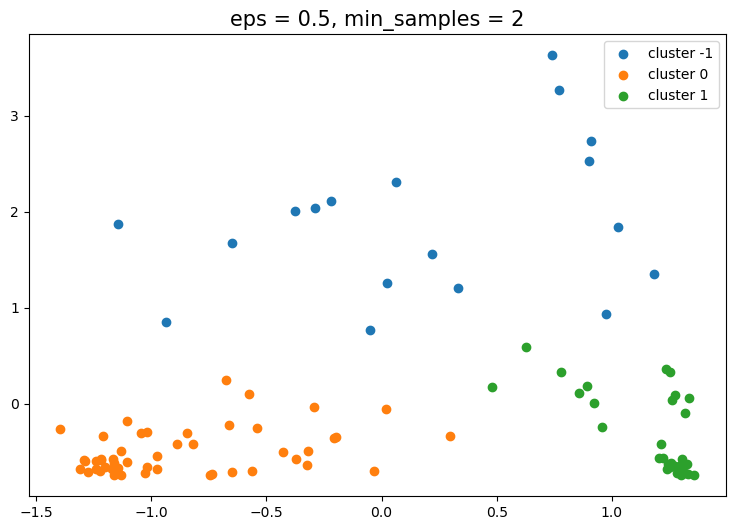

          습도   이전습도절대값  cluster
0  -0.887090 -0.415018        0
1  -0.976239 -0.544712        0
2  -1.016435 -0.653895        0
3  -1.028622 -0.716368        0
4   0.769378  3.266685       -1
..       ...       ...      ...
93  0.890105  0.182760        1
94  0.480316  0.170438        1
95  0.295270 -0.330824        0
96  1.028766  1.840326       -1
97  1.317888 -0.098695        1

[98 rows x 3 columns]


<Figure size 640x480 with 0 Axes>

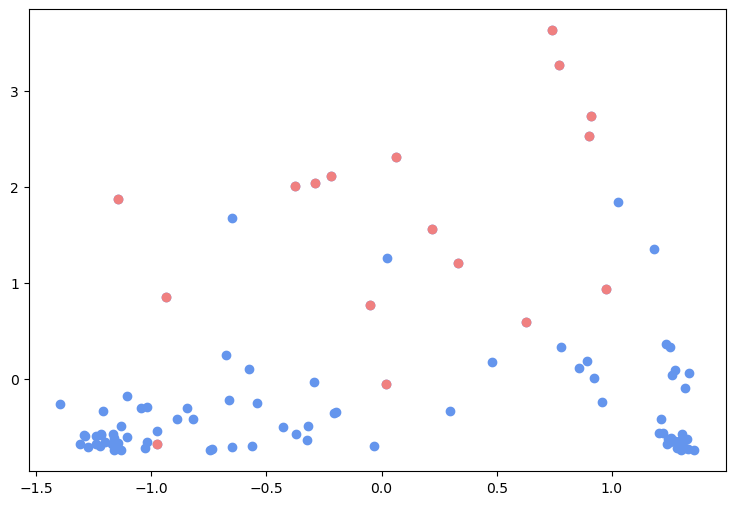

In [7]:
plt.figure(1)
plt.figure(figsize=(9,6))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration

for i in range(-1, df_scale['cluster'].max() + 1):
    plt.scatter(df_scale.loc[df_scale['cluster'] == i, '습도'], df_scale.loc[df_scale['cluster'] == i, '이전습도절대값'], 
                    label = 'cluster ' + str(i))

plt.legend()
plt.title('eps = 0.5, min_samples = 2', size = 15)
plt.savefig('Graph_Humidity_differenceHumidity.jpg', format='jpeg', dpi=300)
plt.show()


print(df_scale)

plt.figure(2)
plt.figure(figsize=(9,6))

for i in range(-1, df_scale['cluster'].max() + 1):
    plt.scatter(df_scale.loc[df_scale['cluster'] == i, '습도'], df_scale.loc[df_scale['cluster'] == i, '이전습도절대값'], 
                    color = 'cornflowerblue')
    
for i in range(len(Data_index1)):
    plt.scatter(df_scale.loc[Data_index1.iloc[i,0], '습도'], df_scale.loc[Data_index1.iloc[i,0], '이전습도절대값'], color='lightcoral')
plt.savefig('Graph_groundtruth.jpg', format='jpeg', dpi=300)

plt.show()

In [8]:
df_scale.to_excel('clustering_result.xlsx')